In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

from matplotlib import animation
from JSAnimation import IPython_display

%matplotlib inline

In [26]:
filename='./data.dat'
with open(filename,'r') as myfile:
    nnod = int(myfile.readline())
    
data = np.genfromtxt(filename,skip_header=1,skip_footer=1)

In [27]:
numSteps=int(len(data.T[0])/nnod)

N = numSteps

x = data.T[0][(N-1)*nnod:(N)*nnod]
y = data.T[1][(N-1)*nnod:(N)*nnod]
z = data.T[2][(N-1)*nnod:(N)*nnod]

div = len(np.unique(x))

print('N =', N, ' and div =', div)

('N =', 34, ' and div =', 21)


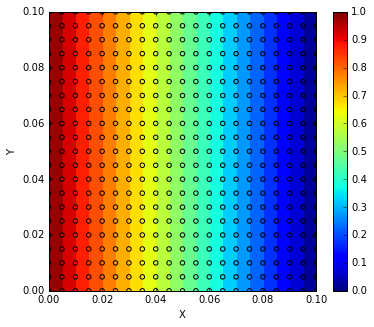

In [28]:
fig = plt.figure(figsize=(6,5))
ax = plt.axes(xlim=(min(x), max(x)), ylim=(min(y), max(y)))

#xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
#xi, yi = np.meshgrid(xi, yi)

#rbf = scipy.interpolate.Rbf(x, y, z, function='linear')
#zi = rbf(xi, yi)

plt.tricontourf(x,y,z,div)
#plt.imshow(zi, vmin=z.min(), vmax=z.max(), origin='lower',
#           extent=[x.min(), x.max(), y.min(), y.max()])
plt.scatter(x, y, c=z)

plt.xlabel('X')
plt.ylabel('Y')

plt.colorbar()
plt.show()


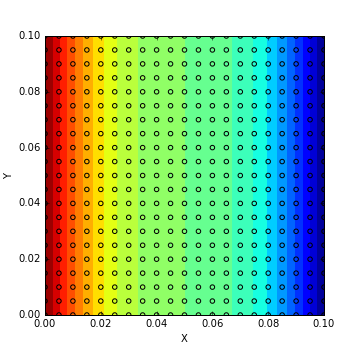
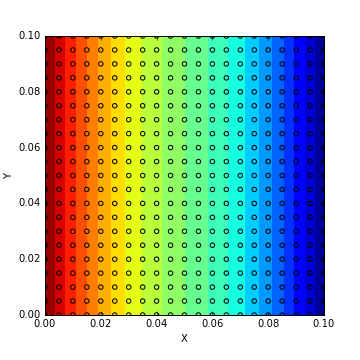
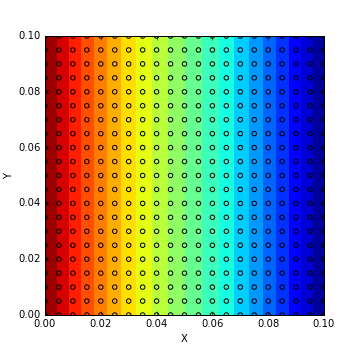
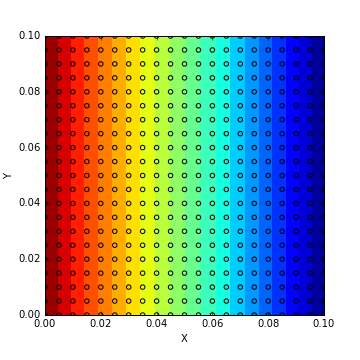
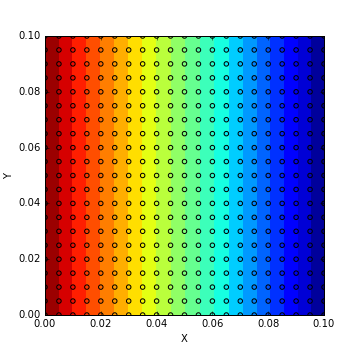
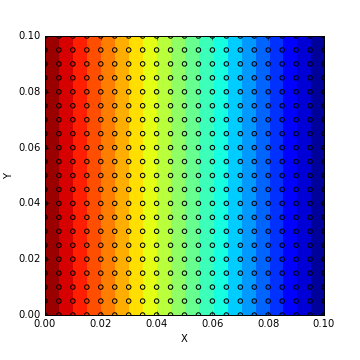
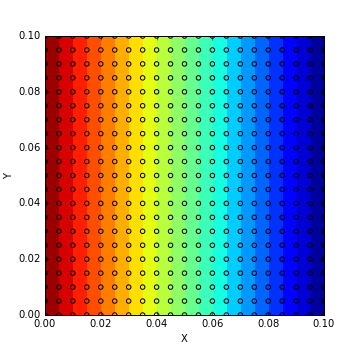
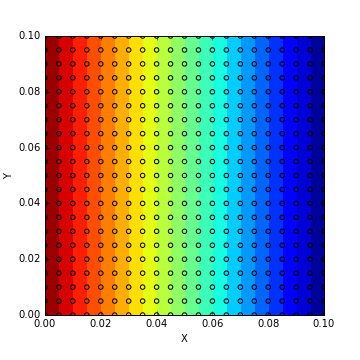
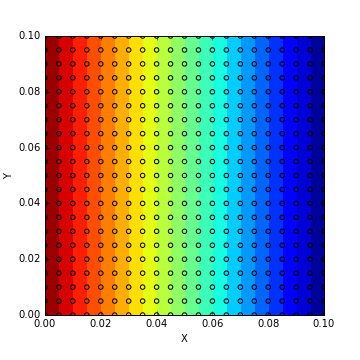
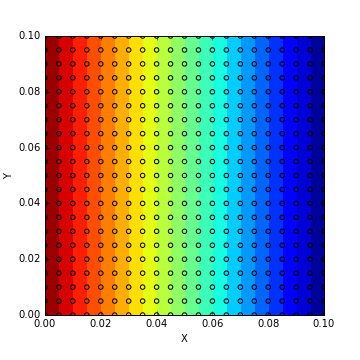
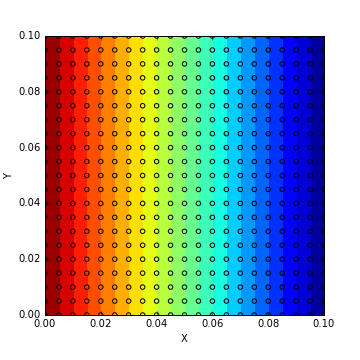
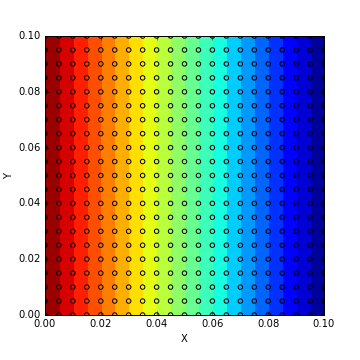
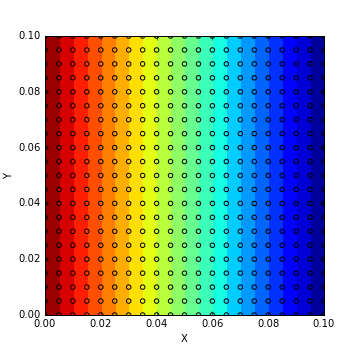
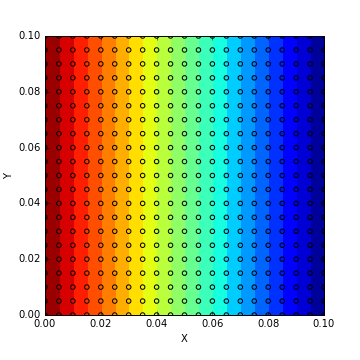
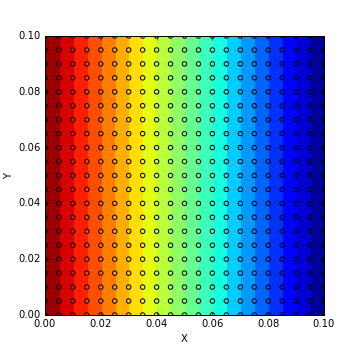
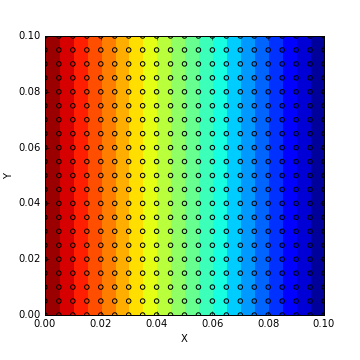
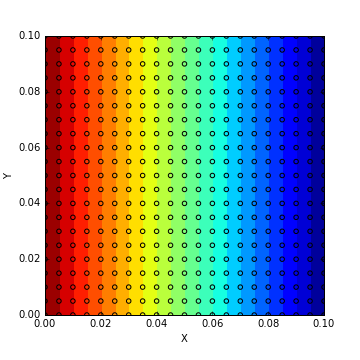
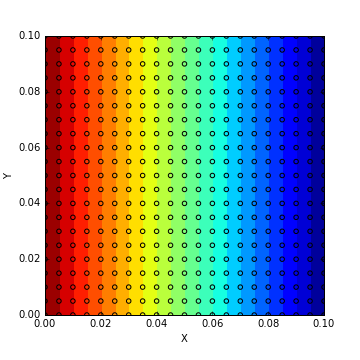
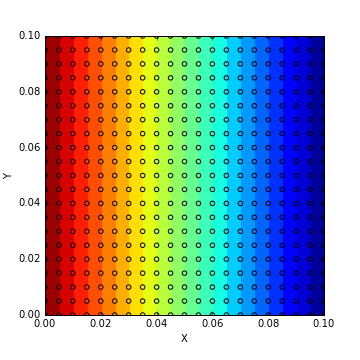
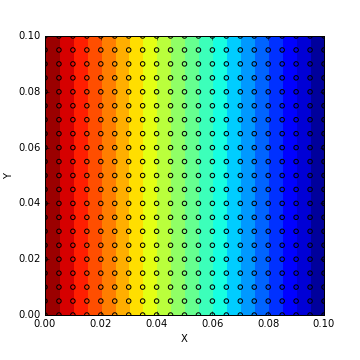
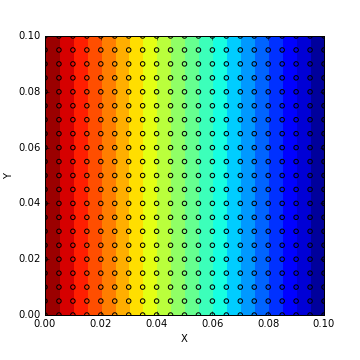
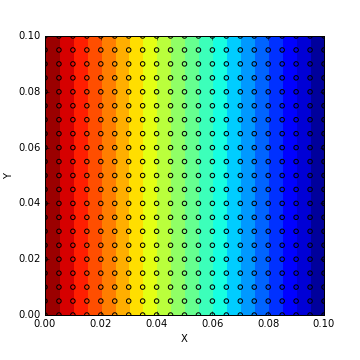
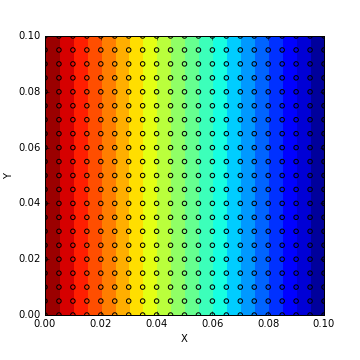
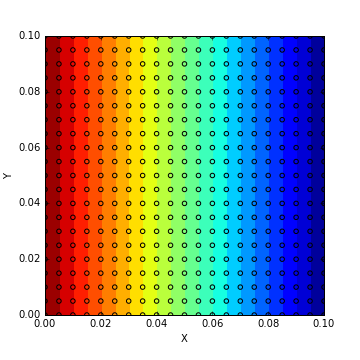
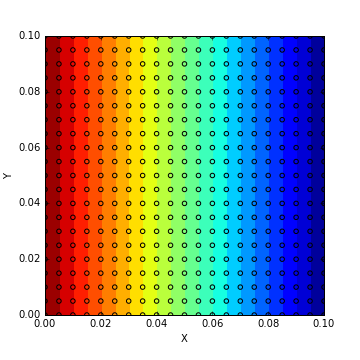
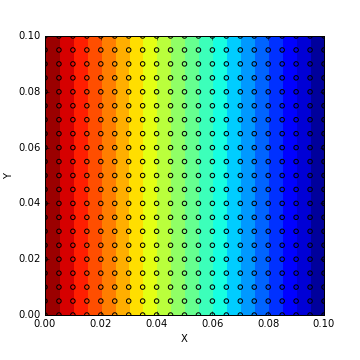
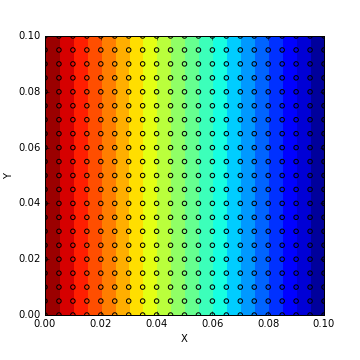
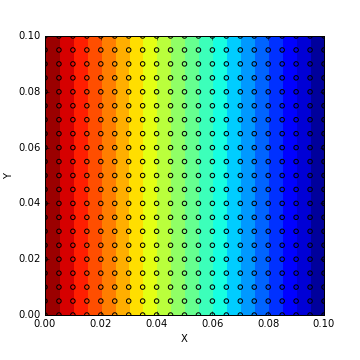
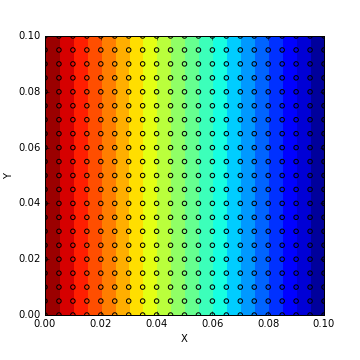
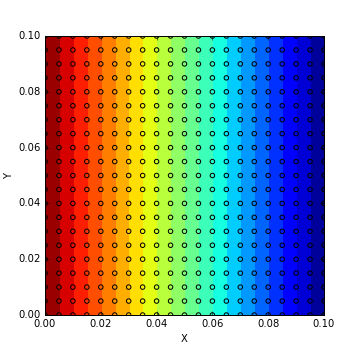
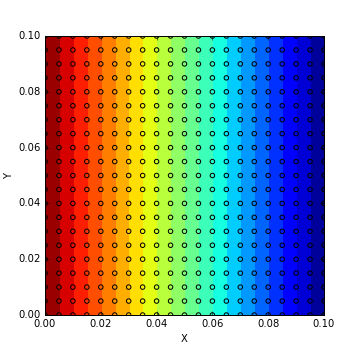
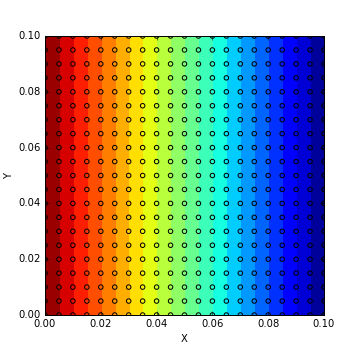
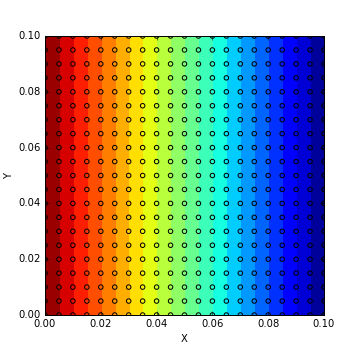
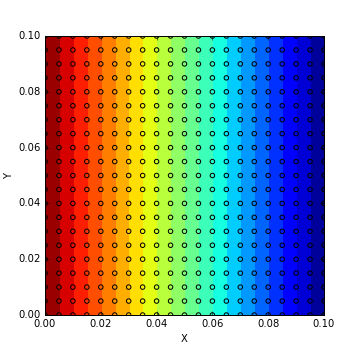

In [29]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes(xlim=(min(x), max(x)), ylim=(min(y), max(y)))

x = data.T[0][:nnod]
y = data.T[1][:nnod]
z = data.T[2][:nnod]

# set up imshow and scatter plots
#triconPlt, = ax.tricontourf(x, y, z, 20)
#scatterPlt, = ax.scatter(x, y, z)

#def init():
#    triconPlt.set_data([], [], [])
#    scatterPlt.set_data([], [], [])
        
#    return tricontourf + scatterPlt

def animate(i):
    x = data.T[0][(i)*nnod:(i+1)*nnod]
    y = data.T[1][(i)*nnod:(i+1)*nnod]
    z = data.T[2][(i)*nnod:(i+1)*nnod]
    
#    xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
#    xi, yi = np.meshgrid(xi, yi)
    
#    rbf = scipy.interpolate.Rbf(x, y, z, function='linear')
#    zi = rbf(xi, yi)
    
#    imshowPlt.set_data(zi)
    ax.tricontourf(x, y, z,div)
    ax.scatter(x, y, c=z)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    
    return 0 # triconPlt+scatterPlt

animation.FuncAnimation(fig, 
                        animate, # The function to create the animation
                        # init_func=init,
                        frames=numSteps, # The number of frames of the animation
                        interval=200, # The time duration of each frame in milliseconds
                        blit=False) # From doc: `If blit=True, func and init_func should return an iterable of drawables to clear.`

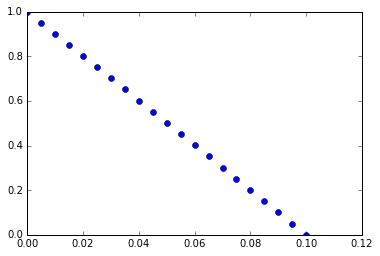

In [37]:
numSteps=int(len(data.T[0])/nnod)

N = numSteps

x = data.T[0][(N-1)*nnod:(N)*nnod]
y = data.T[1][(N-1)*nnod:(N)*nnod]
z = data.T[2][(N-1)*nnod:(N)*nnod]

query = y == 0.0
#x[query]

plt.plot(x[query],z[query],'o')